<a href="https://colab.research.google.com/github/jafetimbre/ms-school-stuff/blob/master/image-processing/where_is_waldo/there_is_waldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gasirea lui Waldo in mediul lui haotic folosind **Template Matching**

In [1]:
import cv2
import numpy as np
from urllib.request import urlopen
import matplotlib.image as m_img
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Se incarca cele doua imagini care se vor folosi:

*   Imaginea de **baza** (`base`) care contine mediul haotic unde Waldo este greu de gasit
*   Imaginea lui **Waldo**, (`waldo`) care se va folosi pentru al gasi

In [2]:
req = urlopen("https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/where_is_waldo/res/waldos_place.png")
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
base = cv2.imdecode(arr, -1)

req = urlopen("https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/where_is_waldo/res/waldo.png")
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
waldo = cv2.imdecode(arr, -1)

Dupa cum se observa, imaginea de baza (`base`) este foarte incarcata cu persoane, culori si actiuni, unde Waldo este dificil de gasit.

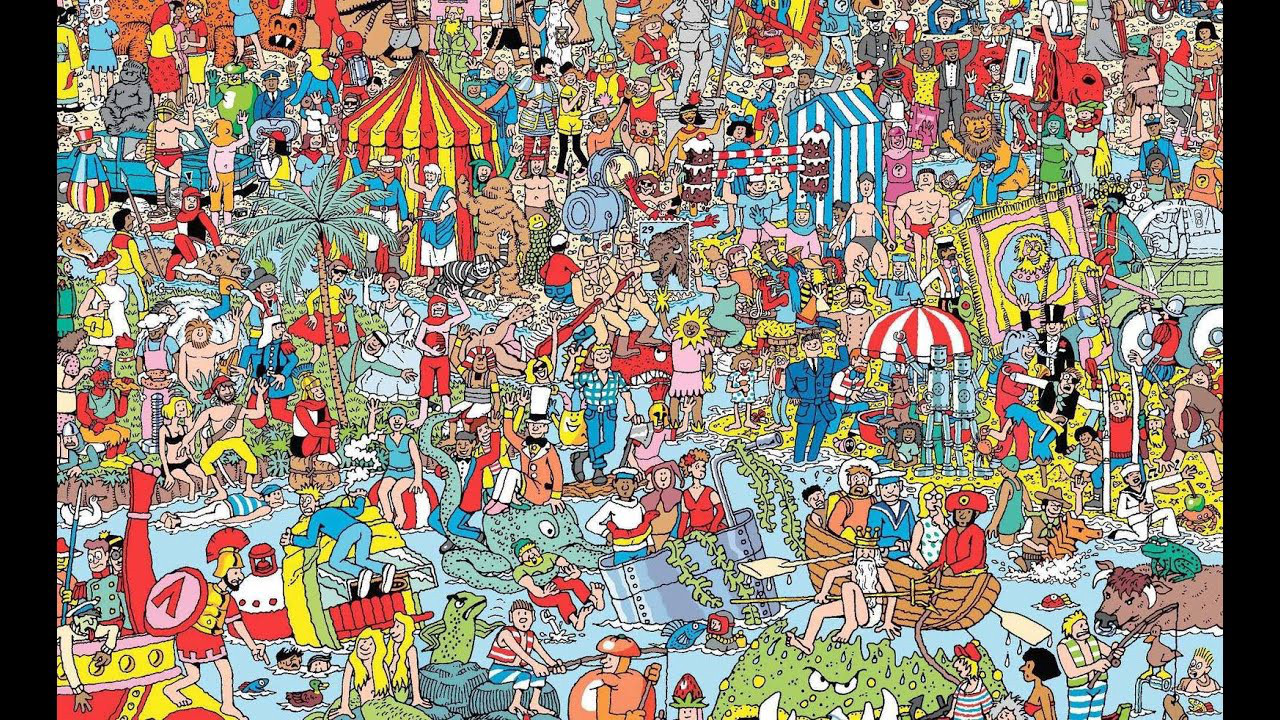

In [3]:
cv2_imshow(base)

Imaginea lui Waldo (`waldo`) arata astfel:

In [4]:
cv2_imshow(waldo)

Pentru prezentarea mai buna a imaginii (`waldo`) s-a aplicat o scalare a portretului cu un factor de `10`. Imaginea rezultata s-a folosit doar pentru prezentare.

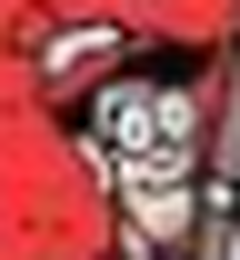

In [5]:
scale_percent = 10 
width = int(waldo.shape[1] * scale_percent)
height = int(waldo.shape[0] * scale_percent)
dim = (width, height)
waldo_scaled = cv2.resize(waldo, dim, interpolation=cv2.INTER_CUBIC)

cv2_imshow(waldo_scaled)

In continuare, ambele imagini se transforma in varianta `grayscale` a acestoara, folosind functia `cvtColor` cu varianta de transformare `COLOR_BGR2GRAY`. De obicei se efectueaza aceasta transformare pentru a restrange dimensionalitatea si complexitatea imaginilor.



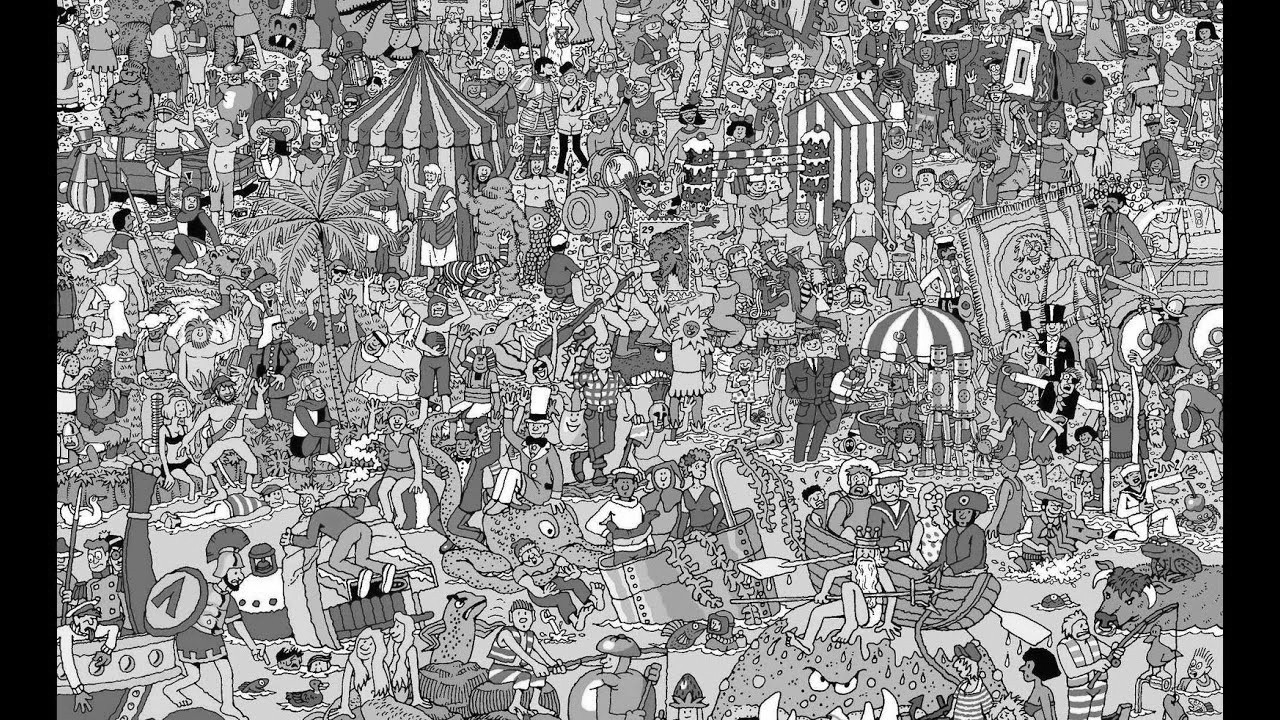

In [6]:
base_gray = cv2.cvtColor(base, cv2.COLOR_BGR2GRAY)
waldo_gray = cv2.cvtColor(waldo, cv2.COLOR_BGR2GRAY)

cv2_imshow(base_gray)

Pasul urmator se foloseste de functia `matchTemplate` din `cv2` care necesita introducerea celor doua imagini (`base` si `waldo`) si metoda folosita. 

Template Matching este defapt ideea de glisare a unei imagini sablon (in cazul de fata imaginea `waldo`) peste o imagine de baza (imaginea `base`). Astfel se compara cele doua si se determina asemanarea.

![Exemplu Template matching](https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/where_is_waldo/res/temp_matching.png)

[Sursa imaginii](https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html)

Exista numeroase metode folosite pentru determinarea asemanarii intre doua imagini, dar in aceasta prezentare se va folosi metoda `TM.CCOEFF_NORMED` descrisa si prin ecuatia urmatoare:


![Metoda TM_CCOEFF_NORMED](https://raw.githubusercontent.com/jafetimbre/ms-school-stuff/master/image-processing/where_is_waldo/res/TM_CCOEFF_NORMED.png)

[Sursa imaginii](https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html)

Acesta functie impreuna cu aceasta metoda returneaza valori intre `[-1, 1]`, astfel o valoare de:

*   `-1` reprezinta o asemanare proasta/minima,
*   `0` reprezinta o asemanare neutra/nula
*   `1` reprezinta o asemanare puternica/maxima


---

(Pentru mai multe detalii despre Template Matching, accesati [lunkul](https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html))


In [7]:
res = cv2.matchTemplate(base_gray, waldo_gray, cv2.TM_CCOEFF_NORMED)

Se va seta o valoare prag `0.7` cu ajtorul careia se vor verifica valorile rezultate din funta `matchTemplate`.

In [8]:
threshold = 0.7
loc = np.where(res >= threshold)

Dupa cum se observa, s-a gasit o pozitie `(x, y)` unde valoarea asemanaarii este peste valoarea prag.

In [9]:
print(*loc[::-1])

[980] [56]


In continuare se va desena un patrat **rosu** peste imaginea de baza, care ne ajuta sa vedem rezultatul procesului.

In [10]:
base_res = cv2.cvtColor(base_gray, cv2.COLOR_GRAY2BGR)

In [11]:
w, h = waldo_gray.shape[::-1]
padding = 5

In [12]:
for pt in zip(*loc[::-1]):
    p1 = (pt[0] - padding, pt[1] - padding)
    p2 = (pt[0] + w + padding, pt[1] + h + padding)
    cv2.rectangle(base_res, p1, p2, (0, 0, 255), 4)

Se afiseaza imaginea rezultata, continand locatia lui Waldo evidentiata.

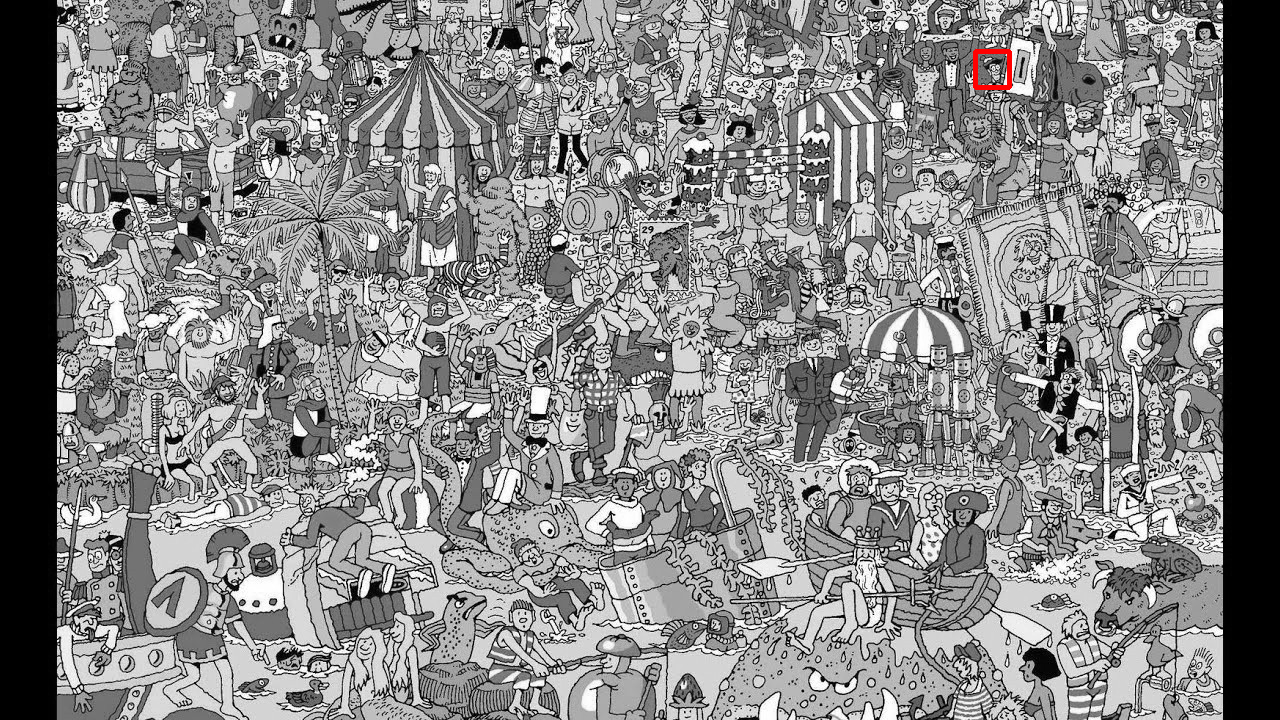

In [13]:
cv2_imshow(base_res)